<a href="https://colab.research.google.com/github/LEECHANGDAEE/gj_proj/blob/main/model_xgb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install mglearn

In [5]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import mglearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [6]:
df = pd.read_csv('DATA_P.csv', encoding='utf-8')

In [7]:
df['PRES_NOTE']

0       준비운동:걷기,정적 스트레칭  루틴프로그램 / 본운동:몸통 들어올리기,누워 다리 들...
1       준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레...
2       준비운동:걷기,조깅,자전거타기 / 본운동:상체 앞으로 숙이기,다리들어 옆으로 올리기...
3       준비운동:전신 루틴 스트레칭 / 본운동:의자 앞에서 앉았다 일어서기,한발 앞으로 내...
4       준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레...
                              ...                        
1426    준비운동:하지 루틴 스트레칭1,전신 루틴 스트레칭 / 본운동:실외 자전거타기,트레드...
1427    준비운동:걷기,실내 자전거타기 / 본운동:손목 펴기/굽히기 / 마무리운동:아래 팔 ...
1428    준비운동:하지 루틴 스트레칭1,전신 루틴 스트레칭 / 본운동:실외 자전거타기,트레드...
1429               본운동:앞뒤로 한발씩 걷기,머리 위로 공 넘기기,스텝박스 오르내리기 
1430    준비운동:몸통 앞으로 굽혀 걷기,발가락 폄근 스트레칭,고정식 자전거 타기 / 본운동...
Name: PRES_NOTE, Length: 1431, dtype: object

In [8]:
for i in range(len(df)):
  if df['PRES_NOTE'][i][:3] == '본운동':
    df['PRES_NOTE'][i] = ' / '+ df['PRES_NOTE'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
df['준비운동'] = df.PRES_NOTE.str.split(' / ').str[0]
df['본운동'] = df.PRES_NOTE.str.split(' / ').str[1]
df['마무리운동'] = df.PRES_NOTE.str.split(' / ').str[2]

In [10]:
df['준비운동']

0                                 준비운동:걷기,정적 스트레칭  루틴프로그램
1       준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레...
2                                        준비운동:걷기,조깅,자전거타기
3                                         준비운동:전신 루틴 스트레칭
4       준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레...
                              ...                        
1426                          준비운동:하지 루틴 스트레칭1,전신 루틴 스트레칭
1427                                     준비운동:걷기,실내 자전거타기
1428                          준비운동:하지 루틴 스트레칭1,전신 루틴 스트레칭
1429                                                     
1430             준비운동:몸통 앞으로 굽혀 걷기,발가락 폄근 스트레칭,고정식 자전거 타기
Name: 준비운동, Length: 1431, dtype: object

In [11]:
df_1 = df['준비운동']

In [12]:
df_2 = df['본운동']

In [13]:
df_3 = df['마무리운동']

In [14]:
df_1[df_1 == ''] = '준비운동:하지 루틴 스트레칭1,상지 루틴 스트레칭,하지 루틴 스트레칭2,전신 루틴 스트레칭'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_2 = df_2.fillna('본운동:누워서 엉덩이 들어올리기,네발기기 자세로 팔 다리 들기,배스트레칭,엉덩이 스트레칭,넙다리 뒤쪽 스트레칭,넙다리 안쪽 스트레칭,트레드밀에서 걷기,실내 자전거타기,수영,계단 올라갔다 내려오기')

In [16]:
df_3 = df_3.fillna('마무리운동:자가근막이완술 루틴 스트레칭')

In [17]:
df_1

0                                 준비운동:걷기,정적 스트레칭  루틴프로그램
1       준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레...
2                                        준비운동:걷기,조깅,자전거타기
3                                         준비운동:전신 루틴 스트레칭
4       준비운동:목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레...
                              ...                        
1426                          준비운동:하지 루틴 스트레칭1,전신 루틴 스트레칭
1427                                     준비운동:걷기,실내 자전거타기
1428                          준비운동:하지 루틴 스트레칭1,전신 루틴 스트레칭
1429    준비운동:하지 루틴 스트레칭1,상지 루틴 스트레칭,하지 루틴 스트레칭2,전신 루틴 ...
1430             준비운동:몸통 앞으로 굽혀 걷기,발가락 폄근 스트레칭,고정식 자전거 타기
Name: 준비운동, Length: 1431, dtype: object

In [18]:
df_3.value_counts()

마무리운동:자가근막이완술 루틴 스트레칭                                                          793
마무리운동:내전근 스트레칭,대퇴사두근 스트레칭                                                       80
마무리운동:전신 루틴 스트레칭,실내 자전거타기                                                       60
마무리운동:하지 루틴 스트레칭1,허리 스트레칭,배스트레칭,좌식생활자를 위한 동적 루틴 스트레칭                            49
마무리운동:실내 자전거타기,허리 스트레칭,짐볼을 이용한 동적 루틴 스트레칭,자가근막이완술 루틴 스트레칭,전신 루틴 스트레칭            44
마무리운동:전신 루틴 스트레칭,트레드밀에서 걷기,자가근막이완술 루틴 스트레칭                                      35
마무리운동:걷기,실내 자전거타기                                                               32
마무리운동:발 닿기,몸 기울이기/회전하기                                                          30
마무리운동:넙다리 뒤쪽 스트레칭,넙다리 앞쪽 스트레칭,넙다리 안쪽 스트레칭,자가근막이완술 루틴 스트레칭                       24
마무리운동:하지 루틴 스트레칭1,하지 루틴 스트레칭2,전신 루틴 스트레칭                                        22
마무리운동:전신 루틴 스트레칭                                                                19
마무리운동:상지 루틴 스트레칭,전신 루틴 스트레칭,자가근막이완술 루틴 스트레칭                                     19
마무리운

In [19]:
for i in range(len(df_1)):
  df_1[i] = df_1[i][5:]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
for i in range(len(df_2)):
  df_2[i] = df_2[i][4:]

In [21]:
for i in range(len(df_3)):
  df_3[i] = df_3[i][6:]

In [22]:
df_1

0                                      걷기,정적 스트레칭  루틴프로그램
1       목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레칭,엉덩이...
2                                             걷기,조깅,자전거타기
3                                              전신 루틴 스트레칭
4       목 스트레칭,등/어깨 뒤쪽 스트레칭,가슴/어깨 앞쪽 스트레칭,옆구리 스트레칭,엉덩이...
                              ...                        
1426                               하지 루틴 스트레칭1,전신 루틴 스트레칭
1427                                          걷기,실내 자전거타기
1428                               하지 루틴 스트레칭1,전신 루틴 스트레칭
1429        하지 루틴 스트레칭1,상지 루틴 스트레칭,하지 루틴 스트레칭2,전신 루틴 스트레칭
1430                  몸통 앞으로 굽혀 걷기,발가락 폄근 스트레칭,고정식 자전거 타기
Name: 준비운동, Length: 1431, dtype: object

In [23]:
ar = np.zeros((1431,96))

In [24]:
ar_1 = np.zeros((1431,200))

In [25]:
ar_2 = np.zeros((1431,57))

In [26]:
df_ar = pd.DataFrame(ar)

In [27]:
df_ar1 = pd.DataFrame(ar_1)
df_ar2 = pd.DataFrame(ar_2)

In [28]:
a = []
b = []
c = []

df_1 =df_1.str.split(',')
df_2 =df_2.str.split(',')
df_3 =df_3.str.split(',')

for i in range(len(df_1)):
  for j in range(len(df_1[i])):
    a.append(df_1[i][j])

for i in range(len(df_2)):
  for j in range(len(df_2[i])):
    b.append(df_2[i][j])

for i in range(len(df_3)):
  for j in range(len(df_3[i])):
    c.append(df_3[i][j])

In [29]:
colname_a = list(set(a))
colname_b = list(set(b))
colname_c = list(set(c))
colname_a.sort()
colname_b.sort()
colname_c.sort()


In [30]:
df_ar.columns = colname_a

In [31]:
df_ar1.columns = colname_b
df_ar2.columns = colname_c

In [32]:
df_ar1

,1단 줄넘기,V자 싸이클,가슴 스트레칭,걷기,계단 두 칸씩 뛰기,계단 두발 뛰기,계단 뛰어 오르기,계단 오르기,계단 올라갔다 내려오기,계단 한발 뛰기,고정식 자전거 타기,고정식 트레드밀에서 걷기,골반 스트레칭,공 양손으로 주고 받기,균형 걷기,깍지 끼고 상체 숙이기,내전근 스트레칭,넙다리 뒤쪽 스트레칭,넙다리 안쪽 스트레칭,네발기기 자세로 팔 다리 들기,누워 다리 들어올리기,누워 무릎 기울기,누워서 굽힌 다리 펴기,누워서 다리 들어올리기,누워서 다리 좌우로 움직이기,누워서 배가로근 수축 I,누워서 배가로근 수축 II,누워서 엉덩이 들어올리기,누워서 전신 뻗기,누워서 하늘 자전거,다리 뻗어 점프하기,다리들어 옆으로 올리기,다리로 짐볼 들어올리기,달리기,대퇴사두근 스트레칭,덤벨 옆으로 들어올리기,덤벨 잡고 뒤꿈치 들기,덤벨 잡고 앉았다 일어서기,덤벨 잡고 한발 내밀어 굽혔다 펴기,등 스트레칭,...,저항밴드 운동 루틴프로그램,전갈자세,전사자세,전신 루틴 스트레칭,전신 비틀며 전진하기,전신 틀어 손벽 마주치기,전완대고 버티기,전진 점프하며 발바닥 찍기,점프 팔굽혀펴기,정적 스트레칭 루틴프로그램,제자리 멀리 뛰기,조깅,좌식생활자를 위한 동적 루틴 스트레칭,줄넘기,줄넘기 운동,짐볼 앉아 중심 잡기 루틴 운동,짐볼 윗몸올리기,짐볼에 다리 올리고 좌우로 움직이기,짐볼을 이용한 동적 루틴 스트레칭,콘운동 루틴프로그램,크런치 사이클,탄력밴드 어깨 가쪽 돌림,턱걸이,트레드밀에서 걷기,팔 교대로 올리기,팔 벌려 뛰기,팔굽혀 펴기,팔굽혀펴기,팔꿈치 고정 후 벌리기,팔꿈치 굽히기,팔다리 교차 버티기,팔벌려뛰기,풍선차기,플렉스 바 비틀기,하지 루틴 스트레칭1,하지 루틴 스트레칭2,한발 앞으로 내밀고 앉았다 일어서기,한발 연속 뛰기,허리 스트레칭,회전근개 스트레칭
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0

In [33]:
for i in df_ar.columns:
  for j in range(len(df_1)):
    if i in df_1[j] :
      df_ar[i][j] = 1

In [34]:
for i in df_ar1.columns:
  for j in range(len(df_1)):
    if i in df_2[j] :
      df_ar1[i][j] = 1

In [35]:
for i in df_ar2.columns:
  for j in range(len(df_1)):
    if i in df_3[j] :
      df_ar2[i][j] = 1

In [103]:
df_ar

,가슴/어깨 앞쪽 스트레칭,걷기,계단 뛰어 오르기,계단 올라갔다 내려오기,고양이 자세,고정식 자전거 타기,고정식 트레드밀에서 걷기,골반 스트레칭,골반 스트레칭2,깍지 끼고 상체 숙이기,넙다리 뒤쪽 스트레칭,넙다리 안쪽 스트레칭,넙다리 앞쪽 스트레칭,네발기기 자세에서 손바닥으로 바닥밀기,누워 한발 원 그리기,누워서 다리 좌우로 움직이기,누워서 배가로근 수축 I,누워서 수직으로 다리 들어올리기,누워서 전신 뻗기,다리들어 옆으로 올리기,달리기,대퇴이두근 스트레칭2,덤벨 옆으로 들어올리기,동적 스트레칭 루틴프로그램,등 대고 대퇴이두근 스트레칭,등/어깨 뒤쪽 스트레칭,뛰어 내렸다가 바로 점프하기,매달려서 다리 들기,목 굽힘/ 폄 I,목 굽힘/ 폄 II,목 돌리기,목 스트레칭,몸통 들어올리기,몸통 비틀기,몸통 앞으로 굽혀 걷기,무릎 들어올리기,무릎굽혀 원 그리기,물고기 자세,바벨 끌어당기기,바벨 들어 팔꿈치 굽히기,...,앉아서 다리 밀기,앉아서 다리 펴기,앉아서 몸통 움츠리기,앉아서 위로 밀기,양발 교차하여 서서 몸통 숙이기,양발 벌려 무릎 밀어내기,양팔 벌려 전신 비틀기,어깨 스트레칭,엉덩이 스트레칭,엉덩이 스트레칭2,엎드려 버티기,엎드려 팔다리 교차올리기,옆구리 스트레칭,왜가리 자세,요가 및 필라테스 루틴프로그램,윗몸 말아 올리기,윗몸 일으키기,윗몸올리기,유산소 운동 전 동적 루틴 스트레칭,의자 이용 평형성운동 루틴 프로그램,의자에 앉아 다리 뻗어 올리기,자가근막이완술 루틴 스트레칭,자전거타기,저항밴드 운동 루틴프로그램,전신 루틴 스트레칭,전진 점프하며 발바닥 찍기,정적 스트레칭 루틴프로그램,조깅,종아리 스트레칭,좌식생활자를 위한 동적 루틴 스트레칭,줄넘기,짐볼 양팔로 밀기,크런치 사이클,턱걸이,트레드밀에서 걷기,팔꿈치 원 그리기,하지 루틴 스트레칭1,하지 루틴 스트레칭2,허리 스트레칭,허리숙여 양팔 돌리기
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1427,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [37]:
df_ar1['1단 줄넘기']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1426    0.0
1427    0.0
1428    0.0
1429    0.0
1430    0.0
Name: 1단 줄넘기, Length: 1431, dtype: float64

In [38]:
df_all = df.drop(['TEST_CNT','AGE_GBN','CENTER_NM','TEST_GBN','INPUT_GBN','CERT_GBN','TEST_YMD','PRES_NOTE','ITEM_F011','ITEM_F029','ITEM_F038','ITEM_F039','준비운동','본운동','마무리운동','ITEM_F009','ITEM_F010','ITEM_F013','ITEM_F014','ITEM_F015','ITEM_F016','ITEM_F017','ITEM_F020','ITEM_F021','ITEM_F023','ITEM_F024','ITEM_F025','ITEM_F026','ITEM_F027','ITEM_F022','ITEM_F019','ITEM_F030','ITEM_F031','ITEM_F032','ITEM_F033','ITEM_F034','ITEM_F035','ITEM_F036','ITEM_F037','ITEM_F040','ITEM_F041'],axis=1)






In [39]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431 entries, 0 to 1430
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TEST_AGE   1431 non-null   int64  
 1   TEST_SEX   1431 non-null   object 
 2   ITEM_F001  1431 non-null   float64
 3   ITEM_F002  1431 non-null   float64
 4   ITEM_F003  1427 non-null   float64
 5   ITEM_F004  1431 non-null   float64
 6   ITEM_F005  1431 non-null   float64
 7   ITEM_F006  1431 non-null   float64
 8   ITEM_F007  1428 non-null   float64
 9   ITEM_F008  1430 non-null   float64
 10  ITEM_F012  1426 non-null   float64
 11  ITEM_F018  1431 non-null   float64
 12  ITEM_F028  1431 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 145.5+ KB


In [40]:
df_all['ITEM_F003'] = df_all['ITEM_F003'].fillna(df_all['ITEM_F003'].mean())
df_all['ITEM_F012'] = df_all['ITEM_F012'].fillna(df_all['ITEM_F012'].mean())
df_all['ITEM_F007'] = df_all['ITEM_F007'].fillna(df_all['ITEM_F007'].mean())
df_all['ITEM_F008'] = df_all['ITEM_F008'].fillna(df_all['ITEM_F008'].mean())

In [41]:
df_all = pd.get_dummies(df_all, columns = ['TEST_SEX'])

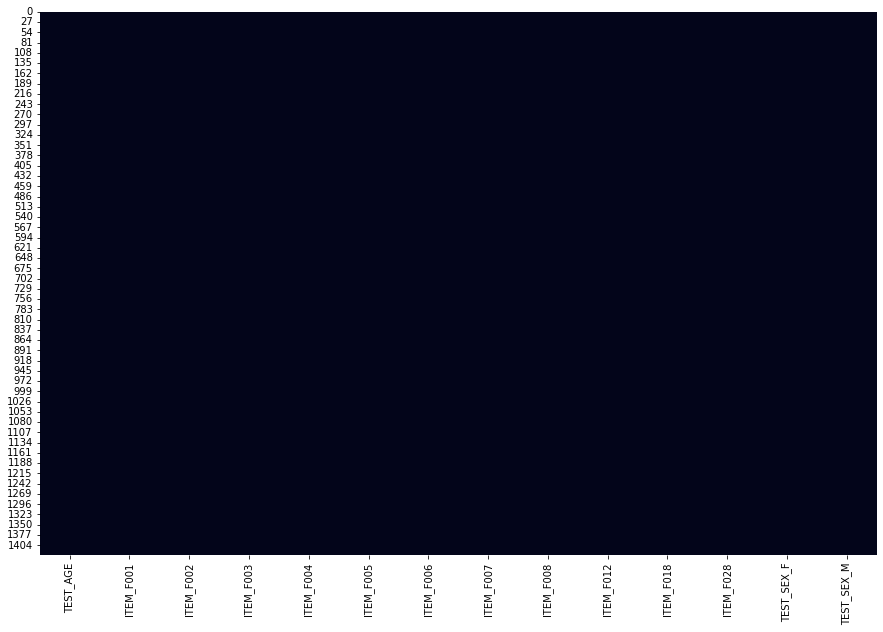

In [42]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(df_all.isnull(), cbar = False)

In [44]:
x = df_all.iloc[0,:]
x = pd.DataFrame(x)
x = x.transpose()

14


In [45]:
x

,TEST_AGE,ITEM_F001,ITEM_F002,ITEM_F003,ITEM_F004,ITEM_F005,ITEM_F006,ITEM_F007,ITEM_F008,ITEM_F012,ITEM_F018,ITEM_F028,TEST_SEX_F,TEST_SEX_M
0,18.0,173.8,65.6,17.8,79.7,77.0,117.0,30.6,40.0,13.7,21.7,60.9,0.0,1.0


In [50]:
from sklearn.model_selection import RandomizedSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

In [107]:
re = []
for i in df_ar.columns:
  re.append(xgb_model.fit(df_all, df_ar[i]).predict(x)[0])

re1 = []
for i in df_ar1.columns:
  re1.append(xgb_model.fit(df_all, df_ar1[i]).predict(x)[0])

re2 = []
for i in df_ar2.columns:
  re2.append(xgb_model.fit(df_all, df_ar2[i]).predict(x)[0])

In [112]:
p_ind=[]
re_se = sorted(re)
re_se.reverse()
for i in re:
  p_ind.append(re_se.index(i)+1)

p_ind1=[]
re_se1 = sorted(re1)
re_se1.reverse()
for i in re1:
  p_ind1.append(re_se1.index(i)+1)

p_ind2=[]
re_se2 = sorted(re2)
re_se2.reverse()
for i in re2:
  p_ind2.append(re_se2.index(i)+1)

In [113]:
aa=[]
for i in range(len(p_ind)):
  if p_ind[i] <= 3:
     aa.append(i)

bb=[]
for i in range(len(p_ind1)):
  if p_ind1[i] <= 3:
     bb.append(i)

cc=[]
for i in range(len(p_ind2)):
  if p_ind2[i] <= 3:
     cc.append(i)


In [117]:
aa

[80, 92, 93]

In [120]:
#준비운동
print(df_ar1.columns[aa[0]])
print(df_ar1.columns[aa[1]])
print(df_ar1.columns[aa[2]])

빠른 발 뛰기
서서 뒤꿈치 들기
서서 바벨 위로 밀기


In [118]:
#본운동
print(df_ar1.columns[bb[0]])
print(df_ar1.columns[bb[1]])
print(df_ar1.columns[bb[2]])

V자 싸이클
누워 다리 들어올리기
손 뻗어 윗몸 일으키기


In [119]:
#마무리운동
print(df_ar1.columns[cc[0]])
print(df_ar1.columns[cc[1]])
print(df_ar1.columns[cc[2]])

고정식 자전거 타기
공 양손으로 주고 받기
뛰어 내렸다가 바로 점프하기
